# Import libraries and data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [3]:
df = pd.read_json('EngTextbooksPDF.json', lines=True)
df.head()

,document,page,text
0,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",0,Student\nSolutions\nManual\n
1,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",1,
2,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",2,Student Solutions Manual\nProbability and Stat...
3,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",3,"..,...(ENGAGE\nLearning-\n•\n© 2016 Cengage Le..."
4,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",4,CONTENTS\nChapter I Overview and Descriptive S...


# Count Textbooks

In [4]:
df['document'].nunique()

53

# Quick View of Page Counts

In [5]:
print(df.groupby('document')['page'].nunique().mean())
print(df.groupby('document')['page'].nunique().min())
print(df.groupby('document')['page'].nunique().max())
df.groupby('document')['page'].describe()

644.0943396226415
14
1824


,count,mean,std,min,25%,50%,75%,max
document,,,,,,,,
"(9th Ed) Jay L. Devore, Matt Carlton - Probability and Statistics for Engineering and the Sciences Solution Manual 9th Ed-Cengage Learning (2016).pdf",222.0,110.5,64.230055,0.0,55.25,110.5,165.75,221.0
A-Guide-to-Writing-as-an-Engineer-4th-Edition.pdf,290.0,144.5,83.860002,0.0,72.25,144.5,216.75,289.0
"Abraham Silberschatz, Henry F. Korth, S. Sudarshan - Instructor's Manual to Accompany Database System Concepts-McGraw-Hill (2010).pdf",212.0,105.5,61.343296,0.0,52.75,105.5,158.25,211.0
"Banks, Jerry_Carson, John S_Nelson, Barry L_Nicol, David M - Discrete-Event System Simulation (2013).pdf",565.0,282.0,163.245725,0.0,141.00,282.0,423.00,564.0
Basic Engineering Circuit Analysis 10th.pdf,865.0,432.0,249.848287,0.0,216.00,432.0,648.00,864.0
Basic Engineering Circuit Analysis 9th Problem Solving Companion.pdf,170.0,84.5,49.218899,0.0,42.25,84.5,126.75,169.0
Control Systems Engineering 6e.pdf,1005.0,502.0,290.262812,0.0,251.00,502.0,753.00,1004.0
"Digital Integrated Circuits, A Design Perspective (1995).pdf",117.0,58.0,33.919021,0.0,29.00,58.0,87.00,116.0
Digital and Analog Communication Systems 8e.pdf,789.0,394.0,227.908973,0.0,197.00,394.0,591.00,788.0


Total Page Counts

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34137 entries, 0 to 34136
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  34137 non-null  object
 1   page      34137 non-null  int64 
 2   text      34137 non-null  object
dtypes: int64(1), object(2)
memory usage: 800.2+ KB


# Quick Character Count

In [7]:
df.groupby('document')['text'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_char_count')

,document,mean_char_count
0,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",1754.265766
1,A-Guide-to-Writing-as-an-Engineer-4th-Edition.pdf,2242.682759
2,"Abraham Silberschatz, Henry F. Korth, S. Sudar...",1578.476415
3,"Banks, Jerry_Carson, John S_Nelson, Barry L_Ni...",2300.472566
4,Basic Engineering Circuit Analysis 10th.pdf,1691.164162
5,Basic Engineering Circuit Analysis 9th Problem...,777.182353
6,Control Systems Engineering 6e.pdf,2091.440796
7,"Digital Integrated Circuits, A Design Perspect...",2293.367521
8,Digital and Analog Communication Systems 8e.pdf,1969.439797
9,ELEC 4502 - Microwave Engineering 4e.pdf,2061.302910


Seems to be 5 textbooks with 0 characters. Let's exclude those.

One other textbook is excluded from a future step, we will add it to the exclude list here to avoid duplicating the following steps.

In [8]:
textbooks_to_exclude = ["ELEC 4702 - Optoelectronics and Photonics 2e.pdf",
                        "Elements of Electromagnetics 6e Solutions.pdf",
                        "MATH 5104 - Intro to Lie Algebra and Representation Theory 3e (Humphreys).pdf",
                        "Numerical Methods 6th.pdf",
                        "PHYS 4807 - Statistical Data Analysis.pdf",
                        "Textbook 1.pdf"]
df = df[~df['document'].isin(textbooks_to_exclude)]
df['document'].nunique()

47

How many total pages now?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32368 entries, 0 to 34136
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  32368 non-null  object
 1   page      32368 non-null  int64 
 2   text      32368 non-null  object
dtypes: int64(1), object(2)
memory usage: 1011.5+ KB


# Page Counts
There also seems to be a textbook with only 17 pages. Upon inspection it appears as if "Numerical Methods 6th.pdf" is a watermarked scan of the title and table of contents only. Let's go back and add it to the exclude list.

In [10]:
print(df.groupby('document')['page'].nunique().mean())
print(df.groupby('document')['page'].nunique().min())
print(df.groupby('document')['page'].nunique().max())
df.groupby('document')['page'].nunique().reset_index(name='mean_page_count')

688.6808510638298
38
1824


,document,mean_page_count
0,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",222
1,A-Guide-to-Writing-as-an-Engineer-4th-Edition.pdf,290
2,"Abraham Silberschatz, Henry F. Korth, S. Sudar...",212
3,"Banks, Jerry_Carson, John S_Nelson, Barry L_Ni...",565
4,Basic Engineering Circuit Analysis 10th.pdf,865
5,Basic Engineering Circuit Analysis 9th Problem...,170
6,Control Systems Engineering 6e.pdf,1005
7,"Digital Integrated Circuits, A Design Perspect...",117
8,Digital and Analog Communication Systems 8e.pdf,789
9,ELEC 4502 - Microwave Engineering 4e.pdf,756


<Axes: >

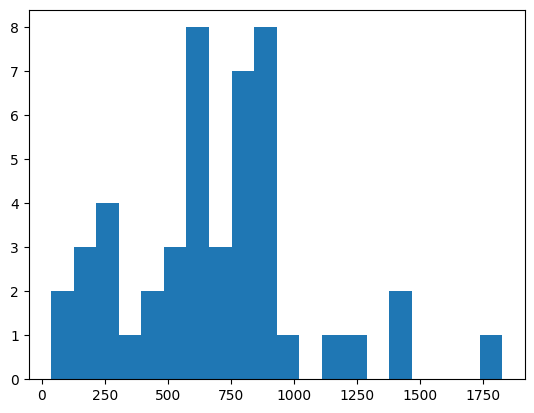

In [11]:
df.groupby('document')['page'].nunique().hist(bins=20, grid=False)

# Character Count
Let's now view the mean number of characters per page from each textbook.

In [12]:
char_count_df = df.copy()
char_count_df['char_count'] = char_count_df['text'].str.len()
char_count_df = char_count_df.groupby('document')['char_count'].mean().reset_index(name='mean_char_count')
print(char_count_df['mean_char_count'].mean())
char_count_df.sort_values('mean_char_count')

2285.414807104133


,document,mean_char_count
5,Basic Engineering Circuit Analysis 9th Problem...,777.182353
15,Elements of Electromagnetics 3rd.pdf,1184.654096
16,Elements of Electromagnetics 6e.pdf,1375.307606
21,Katsuhiko-Ogata-System-Dynamics-4e.pdf,1389.917632
30,OperatingSystemsInternalAndDesignSolutions9thE...,1405.605263
34,Principles of Electric Machines and Power Elec...,1476.334891
33,PHYS 3701 - Introduction to Quantum Mechanics.pdf,1535.271127
40,SYSC 4505 - Modern Control Engineering 5e.pdf,1545.001105
2,"Abraham Silberschatz, Henry F. Korth, S. Sudar...",1578.476415
4,Basic Engineering Circuit Analysis 10th.pdf,1691.164162


<Axes: >

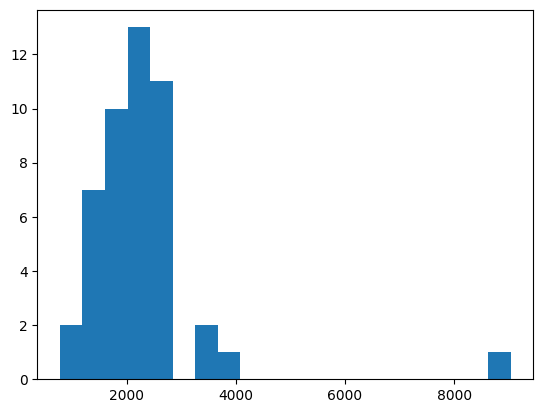

In [14]:
char_count_df.groupby('document')['mean_char_count'].mean().hist(bins=20, grid=False)

Seems to be some outliers with our lowest and highest average character count documents. Let's investigate further.

Here are the document titles:
- Basic Engineering Circuit Analysis 9th Problem Solving Companion.pdf
- SYSC 4602 - Communication Networks - Fundamental Concepts and Key Architectures.pdf

Lets visit a random subset of pages in the middle of each textbook.

`Basic Engineering Circuit Analysis 9th Problem Solving Companion.pdf` is 170 pages.

`SYSC 4602 - Communication Networks - Fundamental Concepts and Key Architectures.pdf` is 886 pages.

,document,page,text,char_count
50,Basic Engineering Circuit Analysis 9th Problem...,50,49\n \n This diagram clearly indicates that L...,663
51,Basic Engineering Circuit Analysis 9th Problem...,51,50\nCHAPTER 7 PROBLEMS \n \n7.1 Use the diffe...,728
52,Basic Engineering Circuit Analysis 9th Problem...,52,51\n4Ω\n12V\n0t =\n( )tv0\n2Ω\n12V\n+\n-\n+-\...,581
53,Basic Engineering Circuit Analysis 9th Problem...,53,52\nCHAPTER 7 SOLUTIONS \n \n7.1 We begin our...,1129
54,Basic Engineering Circuit Analysis 9th Problem...,54,"53\n Then, using current division as shown in...",777
55,Basic Engineering Circuit Analysis 9th Problem...,55,"54\n In addition, since \n \nvC(0) = 6 = k2e°...",695
56,Basic Engineering Circuit Analysis 9th Problem...,56,55\ni = 1mH\n( )ti\nk3R2 =k1R1 =\n \nFig. S7....,730
57,Basic Engineering Circuit Analysis 9th Problem...,57,"56\n \n( )\n0t,mAe5\n0t,mA5ti\nt105.7 5\n>=\n...",529
58,Basic Engineering Circuit Analysis 9th Problem...,58,57\nR = 3k\n12V\n( )+0v0\n+\n-\nk6R2 =k6R1 = ...,894
59,Basic Engineering Circuit Analysis 9th Problem...,59,58\n \n Step-5 The Thevenin equivalent resis...,1033


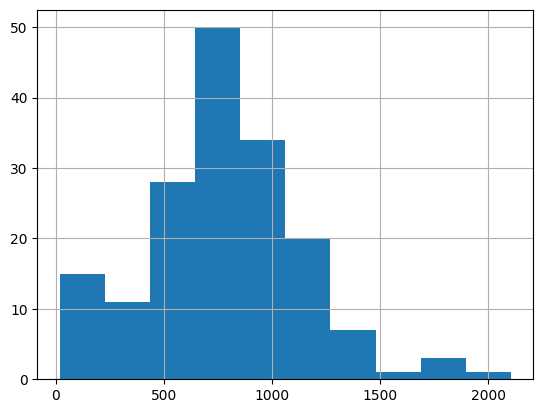

In [16]:
temp_df = df[df['document'] == "Basic Engineering Circuit Analysis 9th Problem Solving Companion.pdf"].reset_index(drop=True)
temp_df['char_count'] = temp_df['text'].str.len()
temp_df['char_count'].hist()
temp_df.iloc[50:60]

It seems like there are lots of equations. This makes sense as it is a problem solving companion, not a proper textbook. Let's inspect the actual textbook itself at page 50 (actually 51).

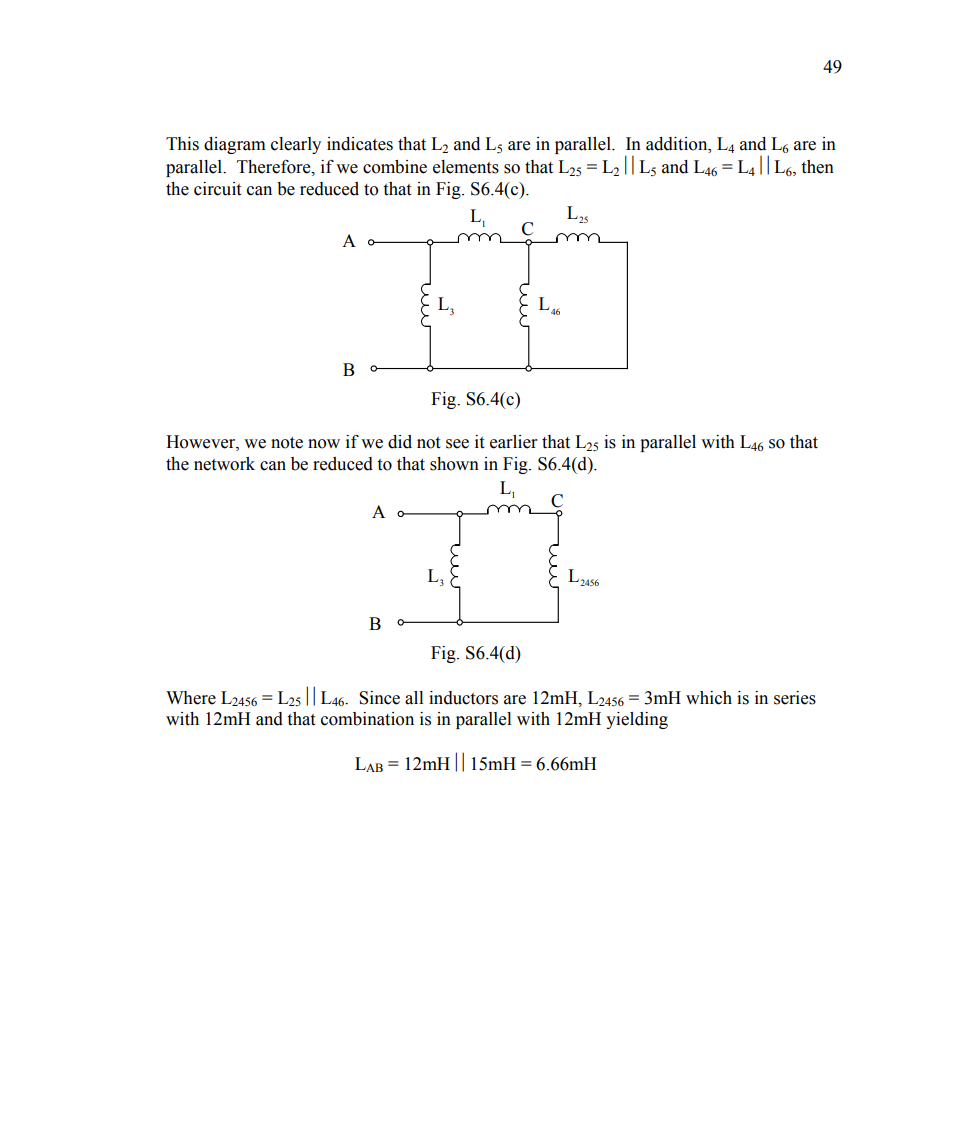

From viewing the actual textbook at these pages, it appears as if the problem is heavily focused on problem solving and consists mostly of figures of circuits, equations and labels. This makes sense why the character count is so low.

,document,page,text,char_count
200,SYSC 4602 - Communication Networks - Fundament...,200,/C49/C49/C46/C67/C111/C110/C115/C105/C100/C101...,10094
201,SYSC 4602 - Communication Networks - Fundament...,201,/C50/C48/C46/C83/C117/C112/C112/C111/C115/C101...,12136
202,SYSC 4602 - Communication Networks - Fundament...,202,/C97/C46 /C87/C104/C97/C116/C105/C115/C116/C10...,11208
203,SYSC 4602 - Communication Networks - Fundament...,203,/C51/C51/C46/C85/C115/C101/C70/C105/C103/C117/...,10596
204,SYSC 4602 - Communication Networks - Fundament...,204,/C70/C105/C114/C115/C116 /C52 /C98/C105/C116/C...,10907
205,SYSC 4602 - Communication Networks - Fundament...,205,/C100/C46 /C87/C114/C105/C116/C101 /C97 /C112/...,7254
206,SYSC 4602 - Communication Networks - Fundament...,206,/C65/C80/C80/C69/C78/C68/C73/C88 /C51/C65\n/C6...,8305
207,SYSC 4602 - Communication Networks - Fundament...,207,/C115/C116/C97/C114/C116 /C98/C105/C116/C44 /C...,4601
208,SYSC 4602 - Communication Networks - Fundament...,208,/C83/C117/C112/C112/C111/C115/C101/C116/C104/C...,2303
209,SYSC 4602 - Communication Networks - Fundament...,209,/C65/C80/C80/C69/C78/C68/C73/C88 /C51/C66\n/C7...,3835


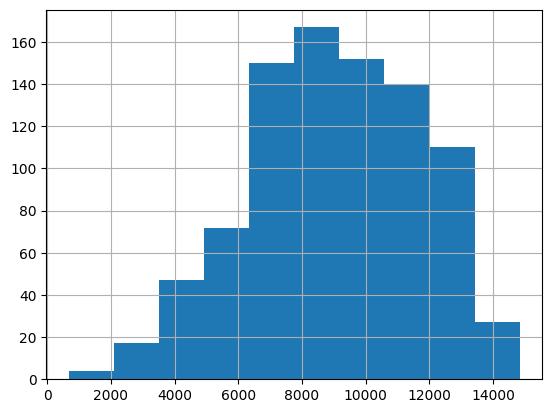

In [17]:
temp_df = df[df['document'] == "SYSC 4602 - Communication Networks - Fundamental Concepts and Key Architectures.pdf"].reset_index(drop=True)
temp_df['char_count'] = temp_df['text'].str.len()
temp_df['char_count'].hist()
temp_df.iloc[200:210]

It seems like there is a large amount of special characters parsed by `PyPDF` for this textbook. We will inspect the raw text for page 200 (201) to see the contents.

In [18]:
print(temp_df.iloc[200]['text'])

/C49/C49/C46/C67/C111/C110/C115/C105/C100/C101/C114/C97/C110/C97/C110/C97/C108/C111/C103/C114/C101/C112/C101/C97/C116/C101/C114/C115/C121/C115/C116/C101/C109/C105/C110/C119/C104/C105/C99/C104/C116/C104/C101/C115/C105/C103/C110/C97/C108/C104/C97/C115/C112/C111/C119/C101/C114/C27/C50
/C120/C97/C110/C100/C101/C97/C99/C104/C115/C116/C97/C103/C101/C97/C100/C100/C115
/C110/C111/C105/C115/C101/C119/C105/C116/C104/C112/C111/C119/C101/C114/C27/C50
/C110/C46/C70/C111/C114/C115/C105/C109/C112/C108/C105/C99/C105/C116/C121/C97/C115/C115/C117/C109/C101/C116/C104/C97/C116/C101/C97/C99/C104/C114/C101/C112/C101/C97/C116/C101/C114/C114/C101/C99/C111/C118/C101/C114/C115/C116/C104/C101/C111/C114/C105/C103/C105/C110/C97/C108/C115/C105/C103/C110/C97/C108
/C119/C105/C116/C104/C111/C117/C116 /C100/C105/C115/C116/C111/C114/C116/C105/C111/C110 /C98/C117/C116 /C116/C104/C97/C116 /C116/C104/C101 /C110/C111/C105/C115/C101 /C97/C99/C99/C117/C109/C117/C108/C97/C116/C101/C115/C46 /C70/C105/C110/C100 /C116/C104/C101 /

Seems to be some kind of parsing error, and only contains special characters. Let's now add it to the exclude list.

In [19]:
textbooks_to_exclude = ["SYSC 4602 - Communication Networks - Fundamental Concepts and Key Architectures.pdf"]
df = df[~df['document'].isin(textbooks_to_exclude)]
df['document'].nunique()

46

# Word Count


In [20]:
word_count_df = df.copy()
word_count_df['tokens'] = word_count_df['text'].apply(lambda x: nltk.word_tokenize(x))
word_count_df['token_count'] = word_count_df['tokens'].apply(len)
word_count_df = word_count_df.groupby('document')['token_count'].mean().reset_index(name='mean_word_count')
print(word_count_df['mean_word_count'].mean())
word_count_df.sort_values('mean_word_count')

433.78785135685956


,document,mean_word_count
5,Basic Engineering Circuit Analysis 9th Problem...,181.358824
34,Principles of Electric Machines and Power Elec...,285.085670
15,Elements of Electromagnetics 3rd.pdf,295.267880
30,OperatingSystemsInternalAndDesignSolutions9thE...,311.684211
14,ELEC 4709 - Sensors and Signal Conditioning 2e...,329.115987
2,"Abraham Silberschatz, Henry F. Korth, S. Sudar...",329.542453
33,PHYS 3701 - Introduction to Quantum Mechanics.pdf,331.894366
21,Katsuhiko-Ogata-System-Dynamics-4e.pdf,332.365508
44,"William Stallings, Lawrie Brown - Computer Sec...",336.090213
16,Elements of Electromagnetics 6e.pdf,337.153244


# Further Cleaning
Although we have already removed textbooks for having no text, text parsing errors, and being a table of contents only, we should still remove blank pages from the dataset.

In [28]:
print(df.shape)
print(df[df['text'] == ''].shape[0])
df = df[df['text'] != '']
print(df.shape)

(31343, 3)
0
(31343, 3)


We saw also during the data inspection phase that there are pages that contain only `\n` characters. Let's inspect and remove those as well.

In [35]:
df[df['text'].str.len() < 15]

,document,page,text
4994,"ELEC 4609 - CMOS - Circuit Design, Layout, and...",3,CMOS
17227,MATH 4821 - Introduction to Quantum Computing ...,0,TEAM LinG
25953,saasbook-1.2.2.pdf,7,iv
25960,saasbook-1.2.2.pdf,14,xi
25971,saasbook-1.2.2.pdf,25,xxii NOTES
25972,saasbook-1.2.2.pdf,26,NOTES 1
26187,saasbook-1.2.2.pdf,241,216 NOTES
26410,saasbook-1.2.2.pdf,464,NOTES 439
26428,saasbook-1.2.2.pdf,482,NOTES 457
28734,SYSC 4502 Computer Networking 7e.pdf,493,Chapter 7.


`Textbook 2.pdf` seems to contain several of these pages. They will be removed. The rest contain chapter and section titles, which may contain useful information for the LLM. They should not be removed.

In [34]:
problem_text = ['•', '\n', '\n \n']
df = df[~df['text'].isin(problem_text)]
print(df.shape)

(31342, 3)


Now that the problematic textbooks and pages are removed from the dataset, let's save a cleaned version of the dataset for future usage.

In [36]:
df.to_json('EngTextbooksPDF_Cleaned.json', lines=True, orient='records')